## Sensistivity Calculations 

This jupyter notebook provides the limiting magnitudes and exposure time of a cubesat designed to observe the ultraviolet specturm of the universe.

Also this code compares different camera detectors, their field of view, focal length and pixel scale.

Credits:
- Gavin Furtado
- Isaac Cheng
- Morgan Fraser

In [1]:
###### Importing all the  required libabries ######

### units from astropy library ###
import astropy.units as u

### importing all necessary python scripts from castor_etc###
from castor_etc.background import Background
from castor_etc.photometry import Photometry
from castor_etc.sources import PointSource
from castor_etc.telescope import Telescope
import castor_etc.parameters as params

### plotting graphs ###
import matplotlib.pyplot as plt

### for data visualisation and plots ###
import pandas as pd

### numpy for calucations & saving a text file ###
import numpy as np

### Only use this to make the code readable ###
### Do not ignore the warnings
import warnings
warnings.filterwarnings('ignore')

### Downloading UV filters / passbands

The passband filters used for this code are the standard filters recommeded by the International Astronomical Union.

Link --> https://www.nuva.eu/uv-photometry/

NOTE: The CASTOR ETC accepts passband units in micrometers, make sure to convert from Angstrong to micrometers if downloaded from the above link.

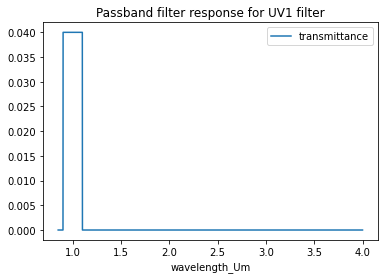

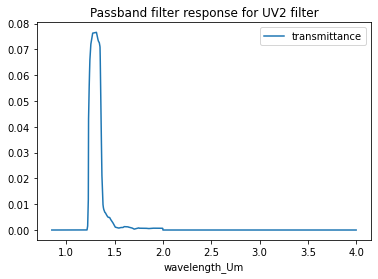

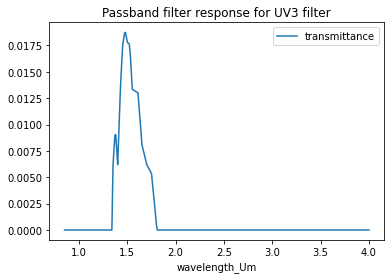

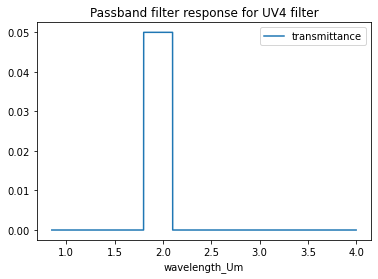

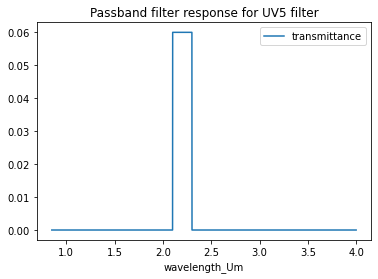

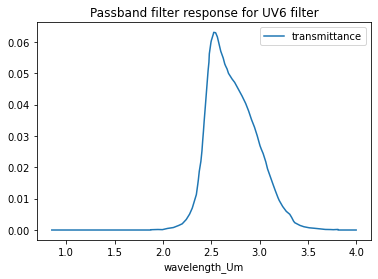

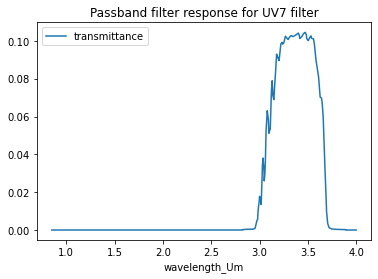

In [2]:
### Read the csv file ###
def read_file(src_path):
    '''
    Input
    ------------------------------------
    The path of the source file which 
    needs to be read
    
    Using pandas it reads the csv file
    
    returns
    ------------------------------------
    A csv file
    '''
    return pd.read_csv(src_path)

### Convert the units ###
def conversion(data_frame):
    '''
    Input
    ------------------------------------
    Data frame with wavelength units 
    in Angstrong
    
    Converts the wavelengths from 
    Angstrong to micrometers
    
    returns 
    ------------------------------------
    Data frame with wavekength 
    in micrometers
    '''
    data_frame['wavelength_A'] = data_frame['wavelength_A']/1000
    data_frame.rename(columns = {'wavelength_A':'wavelength_Um'},
                      inplace=True)
    return data_frame
    
### Plot the graph ###
def plot_filters(data_frame,i):
    '''
    Input
    -------------------------------------
    Data frame in micrometers
    
    Output
    -------------------------------------
    A visual plot of the passband filter
    '''
    data_frame.plot(x='wavelength_Um',
                    y='transmittance',
                    title = f'Passband filter response for UV{i} filter')    
    
### Since there were 7 filters, I looped over 7 times ###
### This can vary depending on your application       ###
for i in range(1,8):
    # Define a path
    path = 'C:\\Users\\user\\Desktop\\castor\\filters_public\\UV'+str(i)+'.csv'
    # Read file
    df = read_file(path)
    # Convert the units
    df_micro = conversion(df)
    # Plot the passband filters
    plot_filters(df_micro, i)
    # Save as per the format mentioned in CASTOR ETC
    np.savetxt(r'C:\Users\user\Desktop\castor\filters_2\uv'+str(i), df_micro, delimiter='  ')



### Comparing detectors

There are several manufacturers that provide different CCD and CMOS detectors. Such as 

##### Hamamatsu CCD Camera - 
https://www.hamamatsu.com/eu/en/product/cameras/ccd-cameras.html

ORCA II Digital CCD camera

- Effective pixels => 1024(H) x 1024(V)
- cell size => 13 Um (H) x 13 (V)
- effective area => 13.3 mm (H) x 13.3 mm (V)
- Long exposre time - 2hours
- Quantum efficiency curve

##### Sony
IMX487
link https://www.sony-semicon.co.jp/e/products/IS/industry/product/uv.html

CMOS sensor

- wavelength => 200-400 nm
- effective pixels => 2856(H) x 2848(V)
- unit cell size => 2.74 Um x 2.74 Um
- chip size 7.82 mm (H) x 7.80 mm (V)
- chip size - diagonal - 11.1 mm
- Global Shutter
- Quantum efficiency

##### Teledyne
https://www.teledyneimaging.com/en/aerospace-and-defense/products/sensors-overview/cmos/orbis/

Orbis UV spectrum but not much info available on these.

- CIS125---RT/RH
- IC-51-12K2B-00-R
- IC-51-12K2F-00-R

https://www.teledyneimaging.com/en/aerospace-and-defense/products/sensors-overview/ccd/ccd47-20/

CCD47-20

- chip size => 13.3
- wavelength => 193-400 nm
- pixel size => 13 Um
- resolution => 1024


For this notebook the camera comparision is limited to Andor manufacterers, some of their cameras are 

- Balor 

https://andor.oxinst.com/products/scmos-camera-series/balor-scmos

- Marana 

https://andor.oxinst.com/products/scmos-camera-series/marana-scmos

- Sona 11

https://andor.oxinst.com/products/scmos-camera-series/sona-scmos

- iStar 334T

https://andor.oxinst.com/products/intensified-camera-series/istar-334t

Formulae to compute the field of view and pixel scale

$$
Field\ of\ view\ =\ \dfrac{Chip\ Size} {Focal\ Length}  \dfrac{180}{\pi}
$$

$$
Pixel\ Scale\ =\ \dfrac{Field\ of\ View}{Number\ of\ pixels}
$$


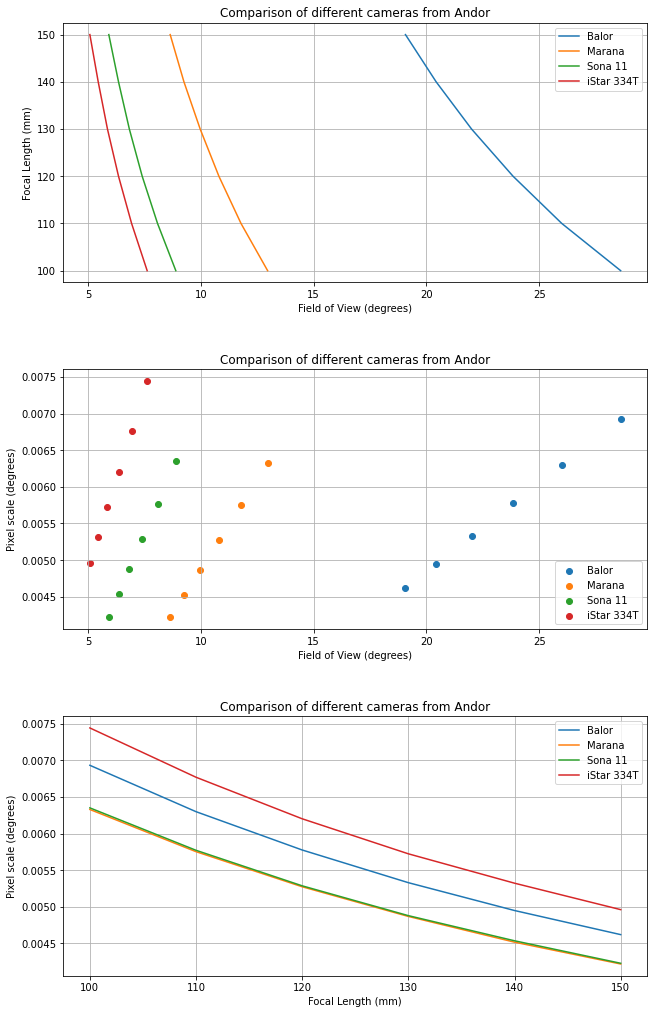

In [3]:
### Camera chip sizes (in mm) ###
chip_size = {'Balor':49.9, 'Marana':22.6, 'Sona 11':15.5, 'iStar 334T':13.3} #dimensions are in mm 

### Number of pixels ###
num_px = {'Balor':4128, 'Marana':2048, 'Sona 11':1400, 'iStar 334T':1024 } 

### pixel scale ###
### These values need to be calculated ###
px_scale = {'Balor':[],'Marana':[],'Sona 11':[],'iStar 334T':[]}

fig = plt.figure(figsize = (10,15))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

## Camera table
camera_table = {'Camera name':[], 
                'Field of View (deg)':[], 
                'Focal Length (mm)':[], 
                'Pixel Scale (deg)':[],
                'Pixel Scale (arcsecond)':[]}

for name, chip_dim in chip_size.items():
    FoV = []
    focal_len = []
    area = []
    
    # Calucation of field of view for a given camera
    for length in range(100,160,10):
        
    # Focal length 100mm, 110mm, 120mm..........
        focal_len.append(length)
    
    # Field of view = (chip size / focal length)
        field = round(((chip_dim / length) * (180/3.14)),2) #degrees
        FoV.append(field)  
        
    # Calculating the area, Area = field of view * field of view
        area.append(round(field**2,2))
    
    # Calculating the pixel scale 
        scale = round((field/num_px[name]), 6)
        
    # px_scale.append(scale)
        px_scale[name].append(scale)
        
    # creating table
        camera_table['Camera name'].append(name)
        camera_table['Field of View (deg)'].append(field)
        camera_table['Focal Length (mm)'].append(length)
        camera_table['Pixel Scale (deg)'].append(scale)
        camera_table['Pixel Scale (arcsecond)'].append(round(scale * 3600, 4))
        
    # Plotting graph
    ax1.plot(FoV, focal_len, label=name)      
    ax2.scatter(FoV, px_scale[name], label = name)  
    ax3.plot(focal_len, px_scale[name], label = name)   

ax1.set_xlabel('Field of View (degrees)')
ax1.set_ylabel('Focal Length (mm)')
ax1.set_title('Comparison of different cameras from Andor')
ax1.grid()
ax1.legend()

ax2.set_xlabel('Field of View (degrees)')
ax2.set_ylabel('Pixel scale (degrees)')
ax2.set_title('Comparison of different cameras from Andor')
ax2.grid()
ax2.legend()

ax3.set_xlabel('Focal Length (mm)')
ax3.set_ylabel('Pixel scale (degrees)')
ax3.set_title('Comparison of different cameras from Andor')
ax3.grid()
ax3.legend()

fig.tight_layout(pad = 4.0)
fig.savefig(r'D:\Gavin\Academics\UCD\Internship\UV_Cubesat_data\Andor_cam_comparison.pdf')

In [4]:
camera_df = pd.DataFrame(camera_table)
camera_df

,Camera name,Field of View (deg),Focal Length (mm),Pixel Scale (deg),Pixel Scale (arcsecond)
0,Balor,28.61,100,0.006931,24.9516
1,Balor,26.00,110,0.006298,22.6728
2,Balor,23.84,120,0.005775,20.7900
3,Balor,22.00,130,0.005329,19.1844
4,Balor,20.43,140,0.004949,17.8164
5,Balor,19.07,150,0.004620,16.6320
6,Marana,12.96,100,0.006328,22.7808
7,Marana,11.78,110,0.005752,20.7072
8,Marana,10.80,120,0.005273,18.9828
9,Marana,9.97,130,0.004868,17.5248


#### Define your parameters

For the uv cubesat mission the parameters that need to be defined are,

- Passband limits
- Mirror Diameter
- Full Width Half Maximum
- Pixel Scale


In [22]:
### Make a dictionary of all the parameters that you wish to change  ###
### example --> dictionary = {'parameters': [val1, val2, val3],      ###
###                           'parameters': {val1, val2,val3}}       ###

'''
Note this the important part because once you enter these values 
the code will compute all the values. And if you try to mofidy    
these parameters later on it might not reflect in the entire code 
which might result in unexpected results.
'''

passbands=["uv1","uv2","uv3","uv4","uv5","uv6","uv7"]

### Define the parameters of each passband filter ####
custom_params = {
    "passbands": ["uv1","uv2","uv3","uv4","uv5","uv6","uv7"],
    "passband_limits": {"uv1": [0.90, 0.110] * u.um,
                        "uv2": [0.120, 0.140] * u.um,
                        "uv3": [0.140, 0.180] * u.um,
                        "uv4": [0.180, 0.210] * u.um,
                        "uv5": [0.210, 0.230] * u.um,
                        "uv6": [0.230, 0.280] * u.um,
                        "uv7": [0.280, 0.350] * u.um},
    
    "passband_response_filepaths": {
        band: f"C:\\Users\\user\\Desktop\\castor\\filters\\{band}" for band in passbands
    },
    
    "passband_response_fileunits": {"uv1": u.um,"uv2": u.um,"uv3": u.um,"uv4": u.um,"uv5": u.um,"uv6": u.um,"uv7": u.um},
    "passband_pivots": None,  # automatically calculate
    "phot_zpts": None,  # automatically calculate
    "phot_zpts_kwargs": {
        "ab_mags": {"uv1": [26, -19.0],  #[positive upper bound, negative lower bound]
                    "uv2": [26, -19.0],
                    "uv3": [26, -19.0],
                    "uv4": [26, -19.0],
                    "uv5": [26, -19.0],  
                    "uv6": [26, -19.0],
                    "uv7": [26, -19.0]},
        "method": "bisection",  # I recommend using bisection since it is more stable
        "tol": 2e-4,
        "max_iter": 100,
    },
    "fwhm": 0.5 * u.arcsec,
    "px_scale": 22.7808 * u.arcsec,  # This value is taken from the data frame in the previous table
    "ifov_dimen": [0.35, 0.30] * u.deg,  # not currently used for any calculations
    "mp": 500,  # not currently used for any calculations
    "mirror_diameter": 8 * u.cm,
    "dark_current": 1.5e-4,  # Marana camera dark noise # maybe you want to change this?
    "read_noise": 1.6, # Read noise of Marana(Andor) detector # maybe you want to change this?
    "redleak_thresholds": {"uv1": 2020 * u.AA,
                           "uv2": 2020 * u.AA,
                           "uv3": 2020 * u.AA,
                           "uv4": 2020 * u.AA,
                           "uv5": 2020 * u.AA,
                           "uv6": 2020 * u.AA,
                           "uv7": 2020 * u.AA},
    "extinction_coeffs": {"uv1": 5.2,
                          "uv2": 5.2,
                          "uv3": 5.2,
                          "uv4": 5.2,
                          "uv5": 5.2,
                          "uv6": 5.2,
                          "uv7": 5.2},
    "show_warnings": True,
}


#### Telescope Design

In [23]:
# Set up telescope instance. Parameters must be passed in during initialization!

MyTelescope = Telescope(**custom_params)

# Check to make sure automatical calculations are working
zpts = MyTelescope.phot_zpts
passband_pivots = MyTelescope.passband_pivots

### Data Visualization ###

### Zero Points Data Frame ###
zpts_df = pd.DataFrame([zpts.keys(),zpts.values()]).T
zpts_df.rename(columns = {0:'Passband Filter', 
                          1:'Zero Point'}, 
               inplace=True)
zpts_df

,Passband Filter,Zero Point
0,uv1,15.863
1,uv2,15.874
2,uv3,14.838
3,uv4,15.818
4,uv5,15.443
5,uv6,16.368
6,uv7,16.689


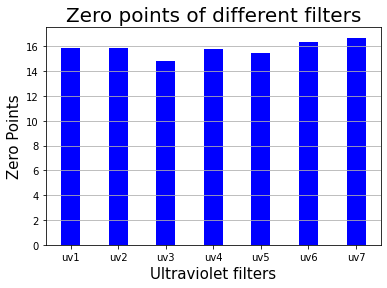

In [24]:
### Zero Points Bar Graph ###
fig, ax = plt.subplots() 
ax.bar(zpts.keys(),zpts.values(), width=0.4, color='blue')
ax.grid(axis='y')
ax.set_xlabel('Ultraviolet filters',fontsize = 15)
ax.set_ylabel('Zero Points',fontsize = 15)
ax.set_title('Zero points of different filters', fontsize =20)
plt.savefig(r'D:\Gavin\Academics\UCD\Internship\UV_Cubesat_data\zeropoints.pdf')

### Exposure time

Calculating the exposure time for different passband filters and different limiting magnitudes.

The SNR of this exposure time is set to 5 and can be changed if needed.

INFO: Point source encircled energy = 74.30%


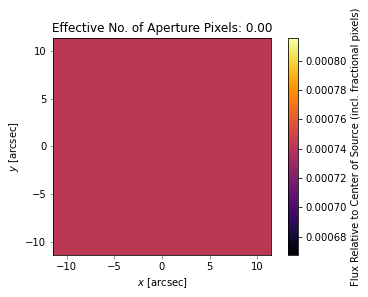

INFO: Point source encircled energy = 74.30%


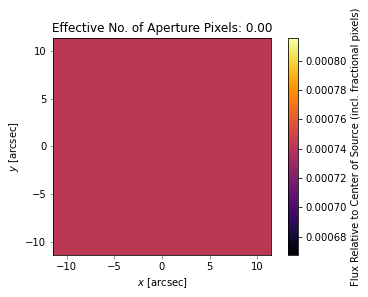

INFO: Point source encircled energy = 74.30%


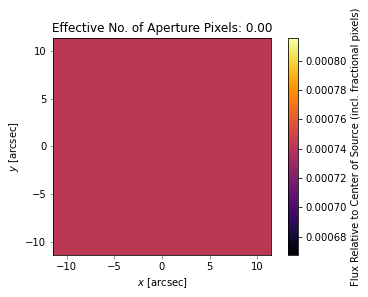

INFO: Point source encircled energy = 74.30%


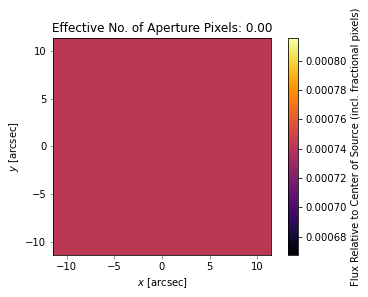

INFO: Point source encircled energy = 74.30%


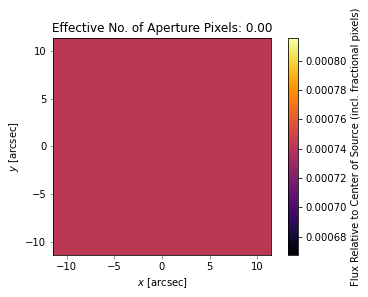

INFO: Point source encircled energy = 74.30%


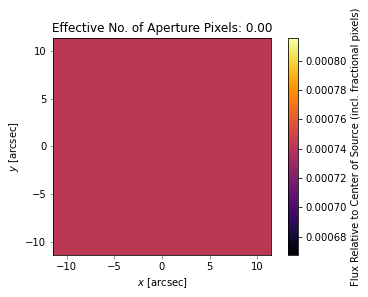

INFO: Point source encircled energy = 74.30%


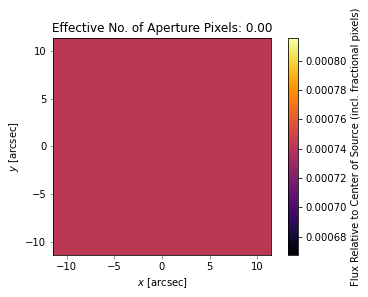

INFO: Point source encircled energy = 74.30%


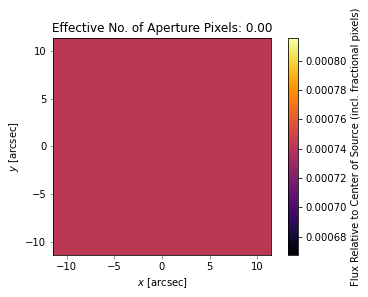

INFO: Point source encircled energy = 74.30%


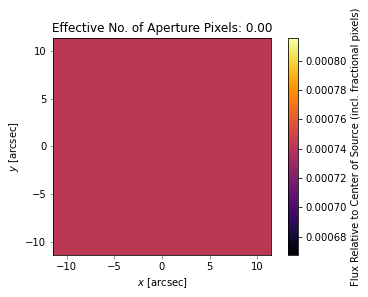

INFO: Point source encircled energy = 74.30%


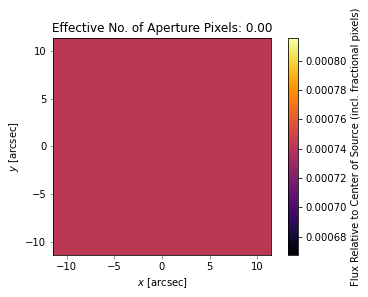

INFO: Point source encircled energy = 74.30%


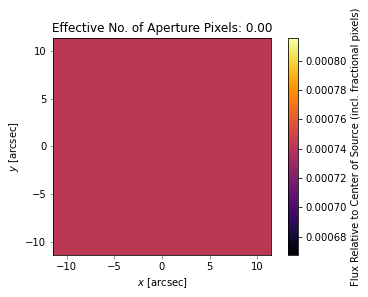

INFO: Point source encircled energy = 74.30%


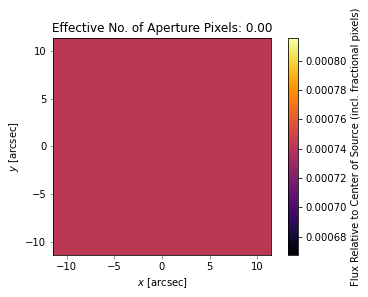

INFO: Point source encircled energy = 74.30%


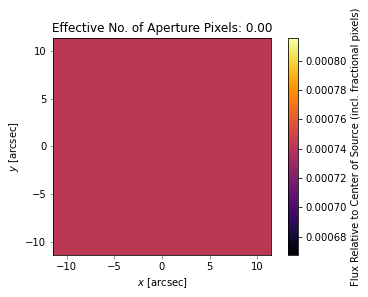

INFO: Point source encircled energy = 74.30%


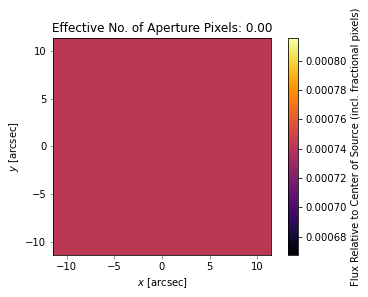

INFO: Point source encircled energy = 74.30%


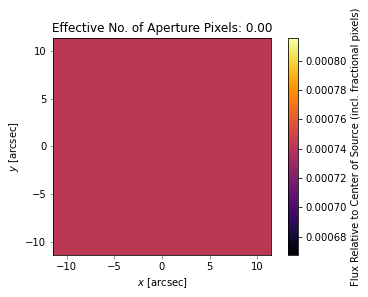

INFO: Point source encircled energy = 74.30%


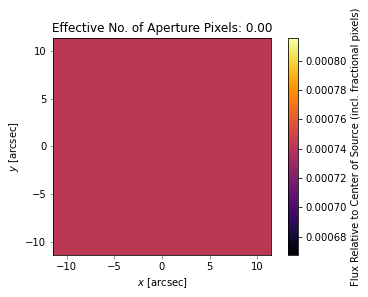

INFO: Point source encircled energy = 74.30%


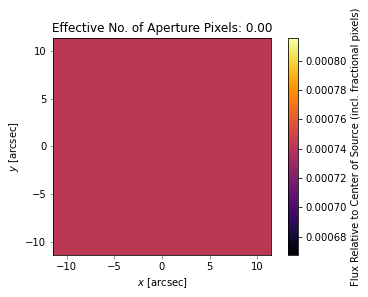

INFO: Point source encircled energy = 74.30%


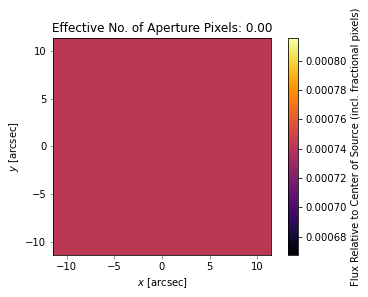

INFO: Point source encircled energy = 74.30%


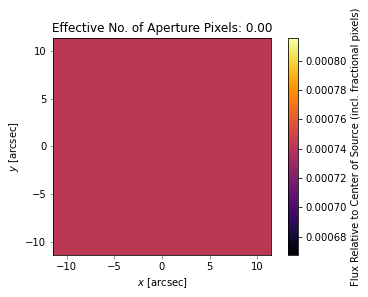

INFO: Point source encircled energy = 74.30%


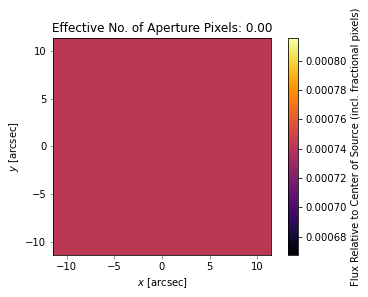

INFO: Point source encircled energy = 74.30%


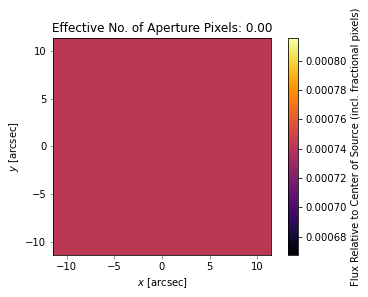

INFO: Point source encircled energy = 74.30%


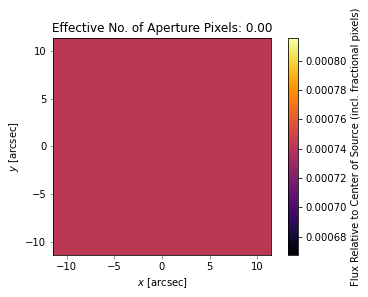

INFO: Point source encircled energy = 74.30%


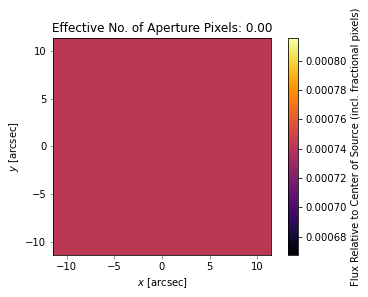

INFO: Point source encircled energy = 74.30%


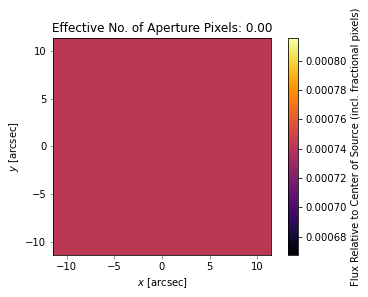

INFO: Point source encircled energy = 74.30%


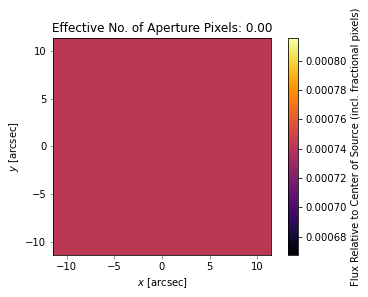

INFO: Point source encircled energy = 74.30%


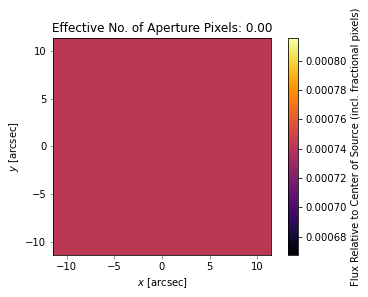

INFO: Point source encircled energy = 74.30%


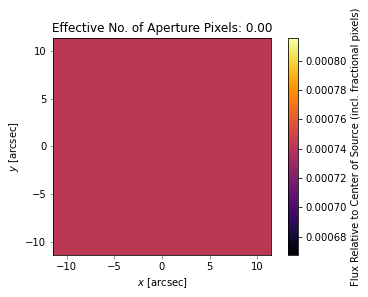

INFO: Point source encircled energy = 74.30%


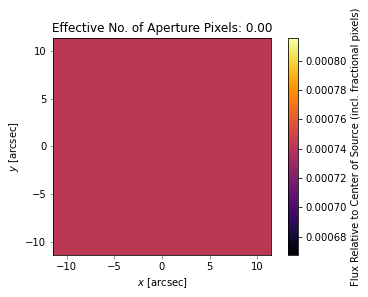

INFO: Point source encircled energy = 74.30%


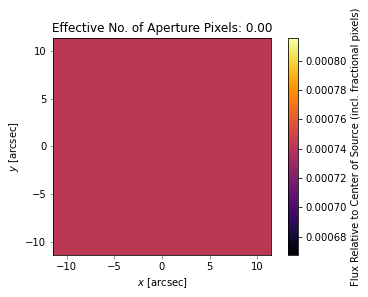

INFO: Point source encircled energy = 74.30%


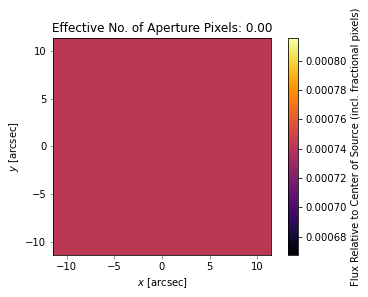

INFO: Point source encircled energy = 74.30%


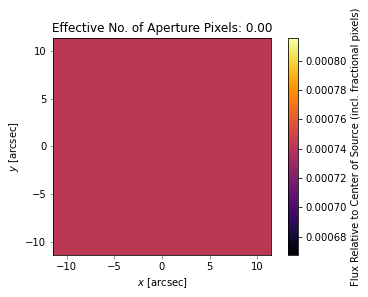

INFO: Point source encircled energy = 74.30%


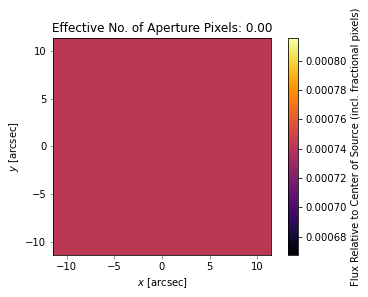

INFO: Point source encircled energy = 74.30%


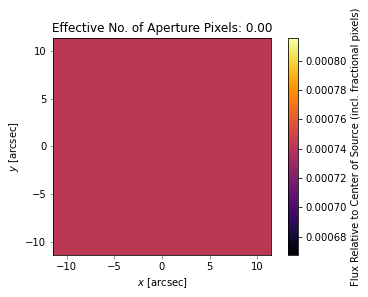

INFO: Point source encircled energy = 74.30%


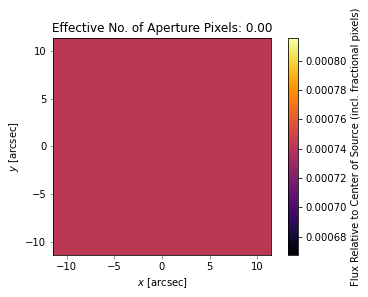

INFO: Point source encircled energy = 74.30%


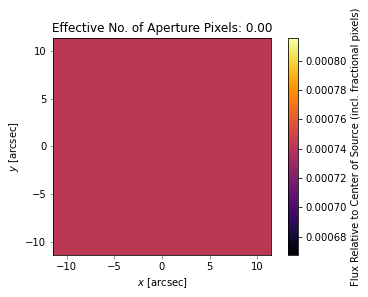

INFO: Point source encircled energy = 74.30%


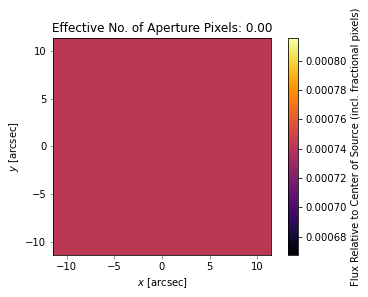

INFO: Point source encircled energy = 74.30%


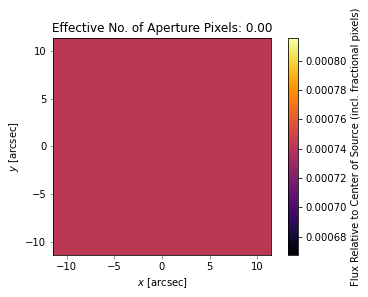

INFO: Point source encircled energy = 74.30%


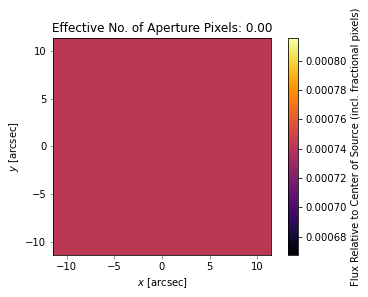

INFO: Point source encircled energy = 74.30%


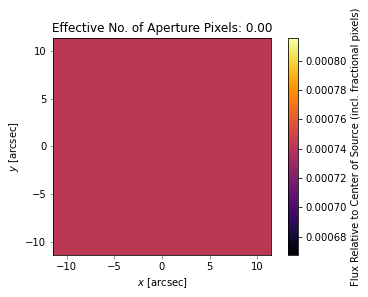

INFO: Point source encircled energy = 74.30%


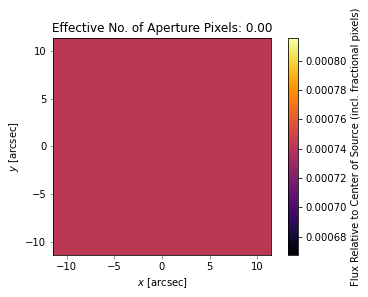

INFO: Point source encircled energy = 74.30%


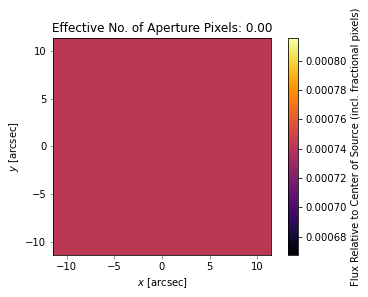

INFO: Point source encircled energy = 74.30%


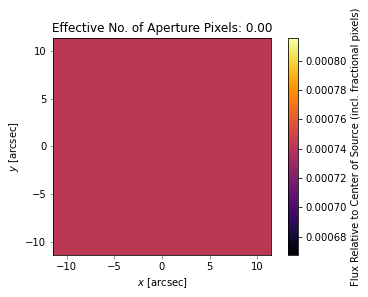

INFO: Point source encircled energy = 74.30%


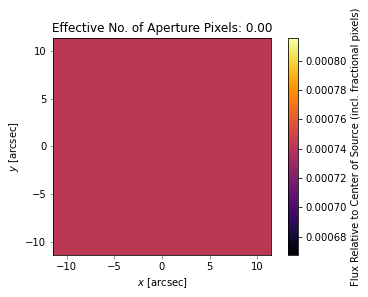

INFO: Point source encircled energy = 74.30%


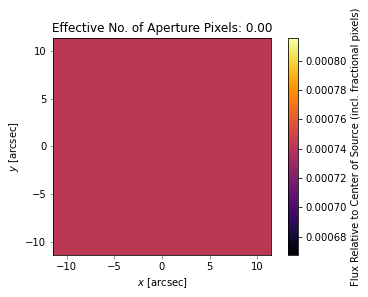

INFO: Point source encircled energy = 74.30%


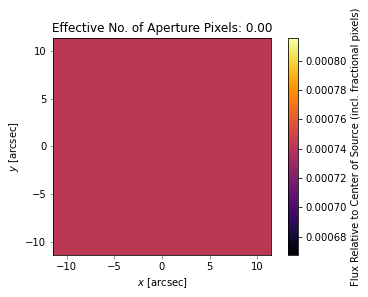

INFO: Point source encircled energy = 74.30%


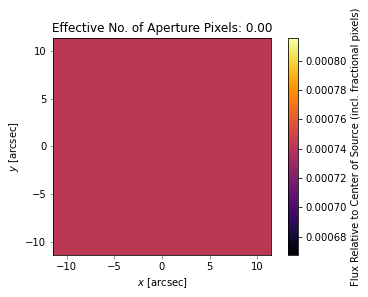

INFO: Point source encircled energy = 74.30%


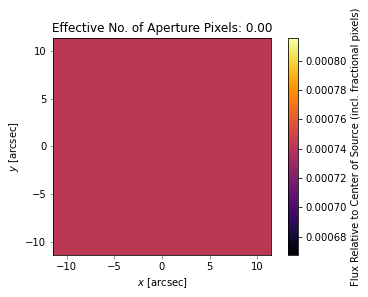

INFO: Point source encircled energy = 74.30%


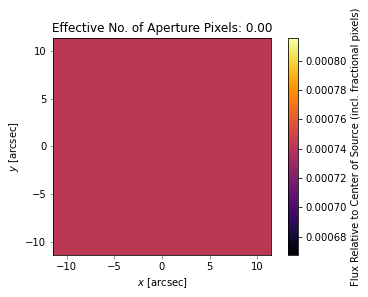

INFO: Point source encircled energy = 74.30%


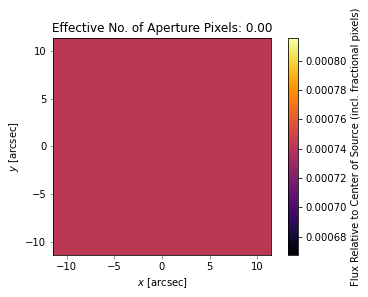

INFO: Point source encircled energy = 74.30%


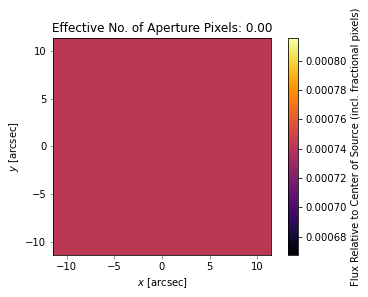

INFO: Point source encircled energy = 74.30%


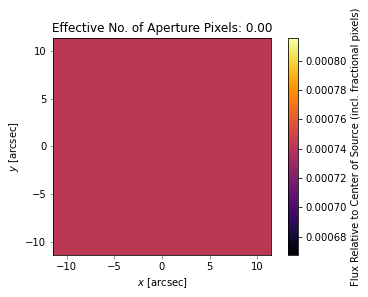

INFO: Point source encircled energy = 74.30%


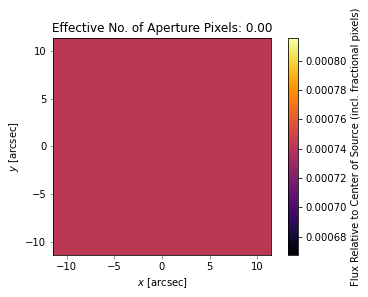

INFO: Point source encircled energy = 74.30%


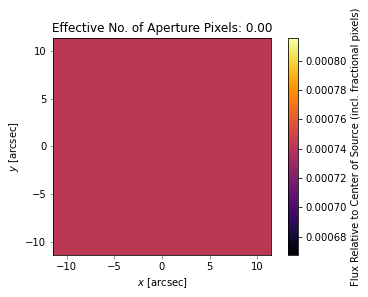

INFO: Point source encircled energy = 74.30%


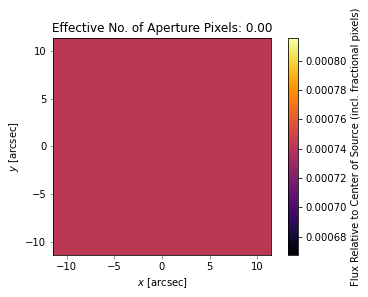

INFO: Point source encircled energy = 74.30%


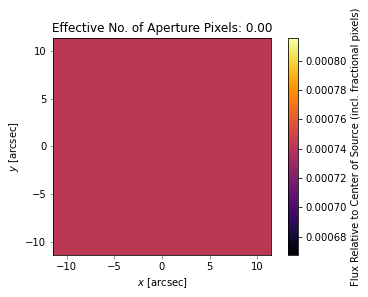

INFO: Point source encircled energy = 74.30%


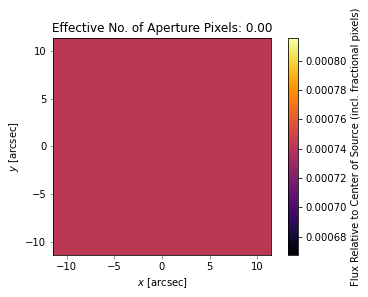

In [25]:
# Defining the Background #
MyBackground = Background()

data_list =[]
sensitivity = {'Passband Filter':[], 
               'Limiting Magnitude':[], 
               'Exposure Time (seconds)':[],
               'Exposure Time (minutes)':[]}

for band in passbands:
    # looping over 7 passbands
    for lim_mag in range(17,25): 
        # looping over limiting magnitude from 17 to 24
        
        # Define point source
        MySource = PointSource()
        MySource.generate_bb(8000 * u.K, redshift=0.06)
        MySource.norm_to_AB_mag(lim_mag, passband=band, TelescopeObj=MyTelescope)
        # MySource.show_spectrum()

        # Photometry #
        MyPhot = Photometry(MyTelescope, MySource, MyBackground)
        MyPhot.use_optimal_aperture()  # dimensions determined by the FWHM of the telescope's PSF
        MyPhot.show_source_weights(quiet=True)
        time = MyPhot.calc_snr_or_t(snr=5)  # time required to reach a signal-to-noise ratio of 5
        
        for key,value in time.items():
            if band == key:
                #data_ = {'band':band, 'lim_mag':lim_mag, 'time':value}
                #print(data_[band]['time'])
                data_ = {band:{'lim_mag':lim_mag, 'time':round(value,2)}}
                data_list.append(data_)
                
                # For Dataframe
                sensitivity['Passband Filter'].append(band)
                sensitivity['Limiting Magnitude'].append(lim_mag)
                sensitivity['Exposure Time (seconds)'].append(round(value,2))
                sensitivity['Exposure Time (minutes)'].append(round(value/60)) # Ronded of minutes value # 

sensitivity['Passband Filter'].append('Swift')
sensitivity['Limiting Magnitude'].append(24)
sensitivity['Exposure Time (seconds)'].append(1000)
sensitivity['Exposure Time (minutes)'].append(round(1000/60))

sensitivity['Passband Filter'].append('Astrosat')
sensitivity['Limiting Magnitude'].append(20)
sensitivity['Exposure Time (seconds)'].append(160)
sensitivity['Exposure Time (minutes)'].append(round(160/60))

sensitivity['Passband Filter'].append('GALEX FUV')
sensitivity['Limiting Magnitude'].append(19.9)
sensitivity['Exposure Time (seconds)'].append(100)
sensitivity['Exposure Time (minutes)'].append(round(100/60))

sensitivity['Passband Filter'].append('GALEX NUV')
sensitivity['Limiting Magnitude'].append(20.8)
sensitivity['Exposure Time (seconds)'].append(100)
sensitivity['Exposure Time (minutes)'].append(round(100/60))

In [26]:
sensitivity_df = pd.DataFrame(sensitivity)
sensitivity_df

### Converting pandas data frame to latex ###
# print(sensitivity_df.to_latex(index=False))

,Passband Filter,Limiting Magnitude,Exposure Time (seconds),Exposure Time (minutes)
0,uv1,17.0,104.87,2
1,uv1,18.0,263.41,4
2,uv1,19.0,661.67,11
3,uv1,20.0,1662.04,28
4,uv1,21.0,4174.90,70
5,uv1,22.0,10487.10,175
6,uv1,23.0,26343.86,439
7,uv1,24.0,66181.98,1103
8,uv2,17.0,103.81,2
9,uv2,18.0,260.76,4


### Plotting the sensitivity graph

The x-axis is exposure time in seconds and y-axis is the limiting magnitude

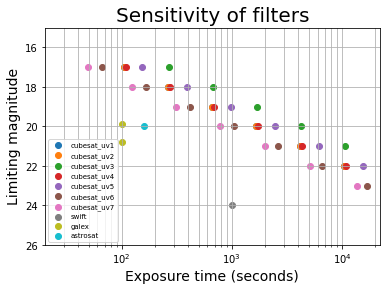

In [27]:
############ Ploting the data obtained #############
mag = []
exp_time = []

### Limiting magnitude of past uv satellites ### 
'''
    Swfit = 24, 1000s
    Astrosat = 20, 160s
    GALEX = 19.9, 100s
            20.8, 100s
'''
past_zpts=[24,20,19.9,20.8]
past_time=[1000,160,100,100]

for data in data_list:
    for k,v in data.items():
        mag.append(v['lim_mag'])
        exp_time.append(v['time'])
        
fig,ax = plt.subplots()
plt.ylim(26,15)
plt.xlim(np.exp(3), np.exp(10))

for count, step in enumerate( range(0,len(mag), 8),start =1):
    plt.scatter(exp_time[step: step + 8], mag[step: step + 8], label=f'cubesat_uv{count}')

plt.xscale('log')
plt.scatter(past_time[0], past_zpts[0], label = 'swift')
plt.scatter(past_time[2:4], past_zpts[2:4], label = 'galex')
plt.scatter(past_time[1], past_zpts[1], label = 'astrosat')
plt.xlabel('Exposure time (seconds)', fontsize = 14)
plt.ylabel('Limiting magnitude', fontsize = 14)
plt.title('Sensitivity of filters', fontsize = 20)
plt.legend(loc='lower left',fontsize='7')
plt.grid(True, which='both')
plt.savefig(f'D:\\Gavin\\Academics\\UCD\\Internship\\UV_Cubesat_data\\sensitivity for pixel scale {MyTelescope.px_scale}.pdf')

#### Conclusion

So how much sensitivity can we attain in given exposure time?

17-19 mag in 2-5 minutes / 50-350 seconds

Marana	Camera 
- FoV 12.96 x 12.96	degress (full angle) 
- Focal Length 100	
- Pixel Scale 22.7808 arcseconds

In [28]:
new_df = sensitivity_df[48:60]

<AxesSubplot:xlabel='Exposure Time (seconds)', ylabel='Limiting Magnitude'>

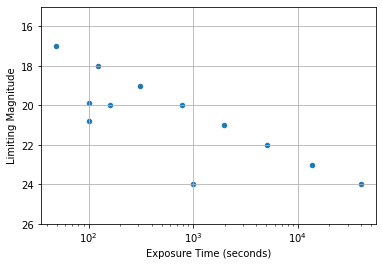

In [29]:
fig, ax = plt.subplots()
new_df.plot(x='Exposure Time (seconds)',
                              y='Limiting Magnitude',
                              kind='scatter', 
                              ylim=(26,15), 
                              logx=True, 
                              grid=True,
                              ax=ax)

#plt.text(100,17.5,'hi',fontsize='15', c='red')
#plt.show()